**DIABETES_CLASSIFICATION**

In [3]:
import numpy as np
import pandas as pd
diabetes = pd.read_csv("D:\diabetes.csv", na_values=['NA'])
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
diabetes.tail(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1
755,1,128,88,39,110,36.5,1.057,37,1
756,7,137,90,41,0,32.0,0.391,39,0
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0


In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

C:\Users\Red Dot\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Red Dot\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


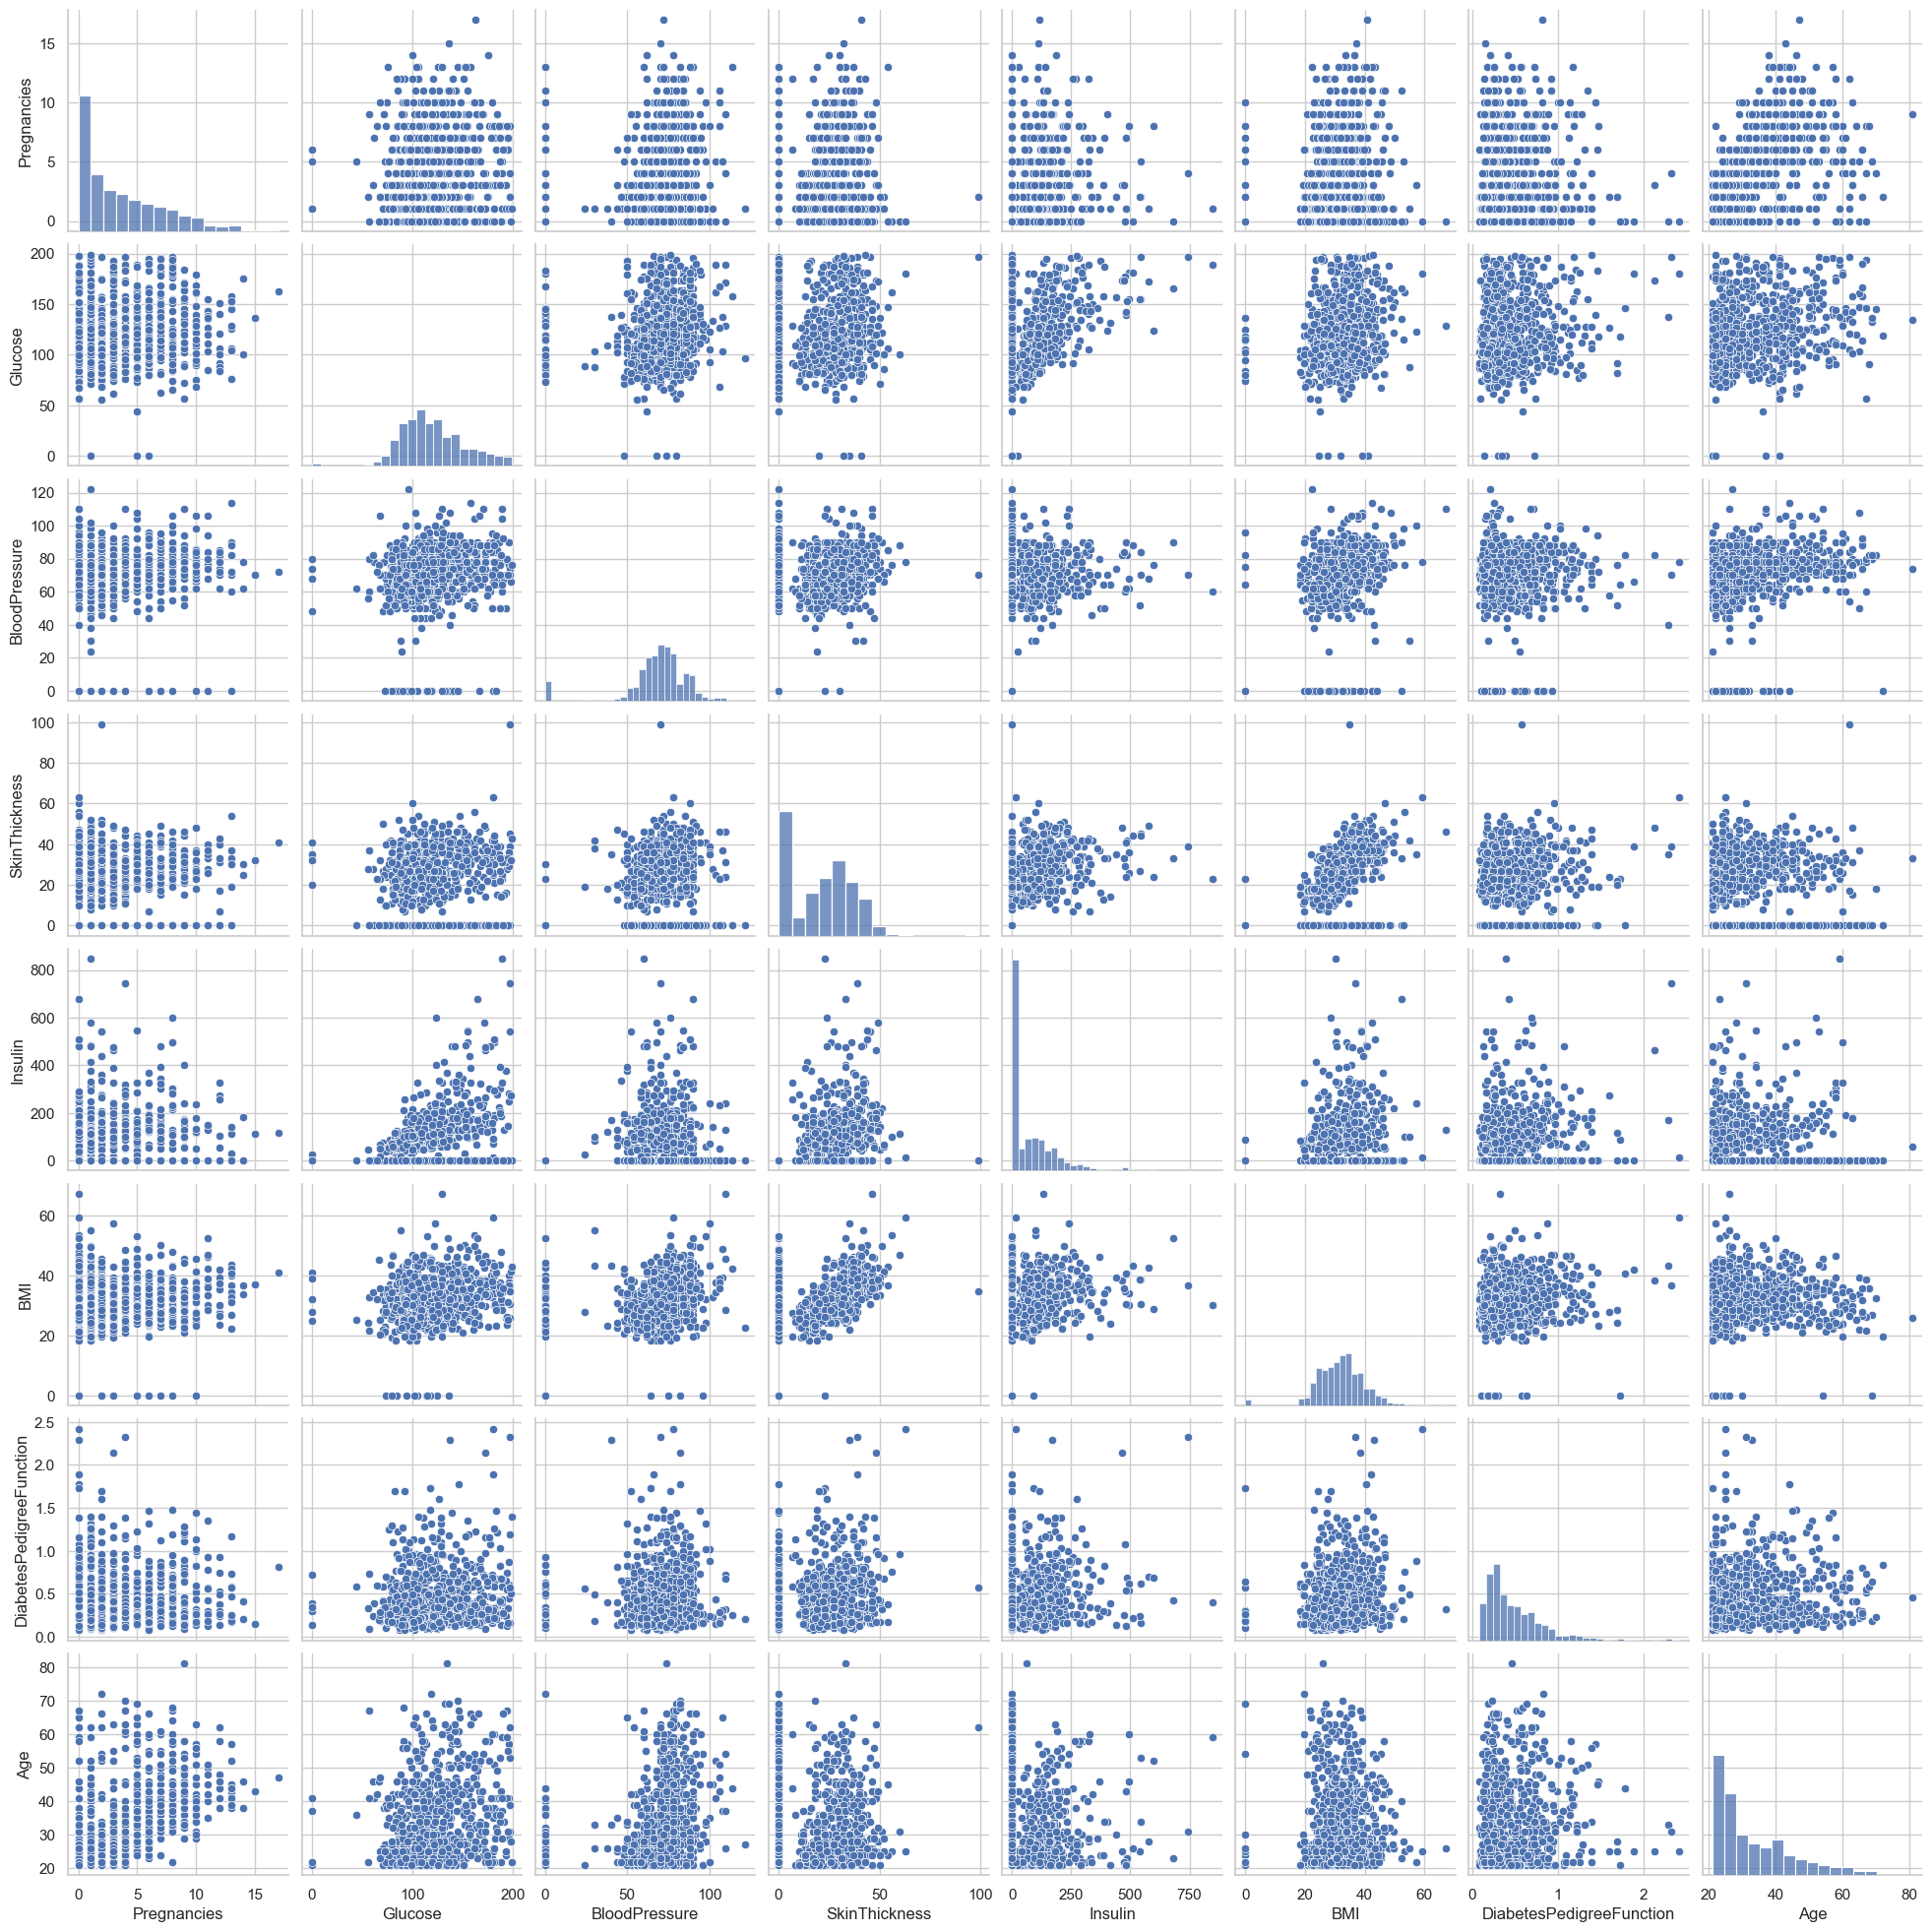

In [8]:
sns.pairplot(diabetes[cols], size=2.5);
plt.show()

**CORELATION MATRIX**

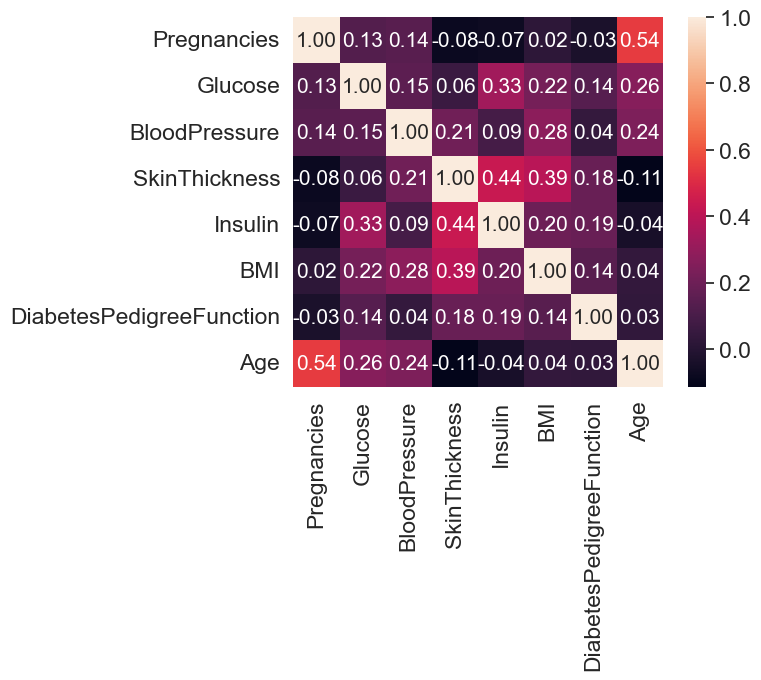

In [9]:
import numpy as np
cm = np.corrcoef(diabetes[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)
plt.show()

In [10]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return self.net_input(X)

**LINEAR REGRESSION**

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
X = diabetes[['Age']].values
y = diabetes['Pregnancies'].values

# Standardize the features
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

# Standardize the target variable
sc_y = StandardScaler()
y_std = sc_y.fit_transform(y.reshape(-1, 1))

# Create a LinearRegression model
lr = LinearRegression()

# Fit the model with standardized data
lr.fit(X_std, y_std)

LinearRegression()

In [28]:
def lin_regplot(X, y, model): 
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

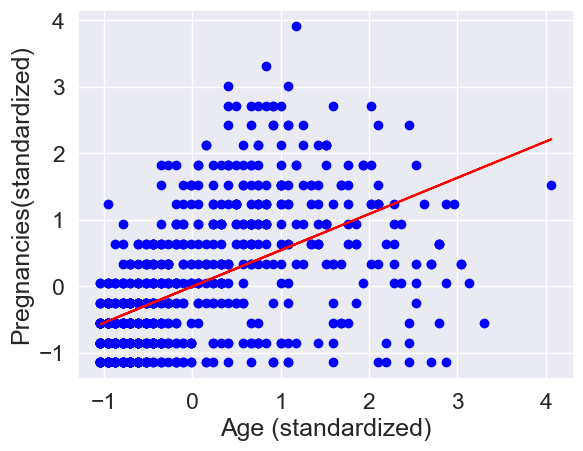

In [29]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Age (standardized)')
plt.ylabel('Pregnancies(standardized)')
plt.show()

**DECISION TREE**

In [ ]:
#decision tree

In [30]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
data=pd.read_csv("D:\diabetes.csv")
 

In [31]:
X=data[data.columns[0:-1]]
#del(X['SkinThickness'])
#del(X['BloodPressure'])
#del(X['Pregnancies'])
#del(X['Insulin'])
#del(X['DiabetesPedigreeFunction'])
#del(X['Glucose'])
Y=data[data.columns[-1]]
# create a helper function

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,stratify=Y,random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.818
Accuracy on test set: 0.766


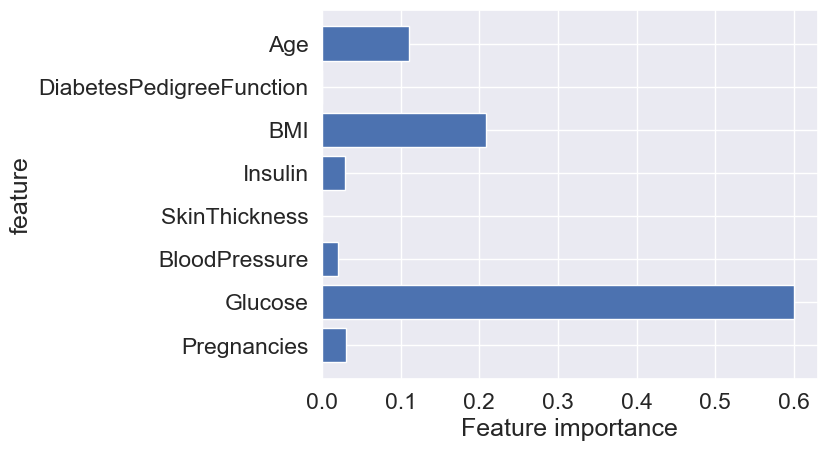

In [33]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_adult_census(model):
    n_features = X.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("feature")
    ##plt.show()
    ##fig=plt.figure()
    plt.savefig("feature_imporatnace_diabetes.png")
    plt.show()
    plt.close()
plot_feature_importances_adult_census(tree)

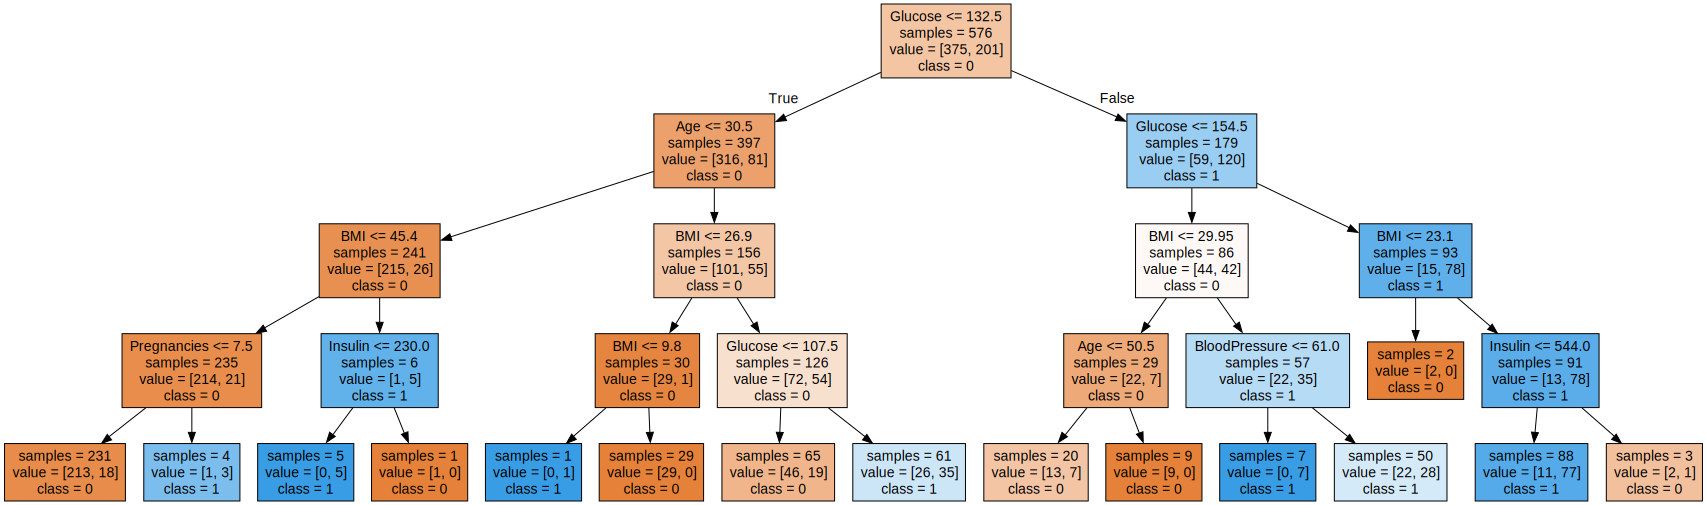

In [34]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="diabetes_census_tree.dot",class_names=["0","1"],
feature_names=X.columns,impurity=False,filled=True)
import graphviz
with open("diabetes_census_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [35]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.03062805 0.60031199 0.02050097 0.         0.02905047 0.20862162
 0.         0.11088691]
